In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [ ]:
plt.rcParams["font.family"] = "monospace"

In [8]:
designs = pd.read_json("data/20240827_data.json")

In [10]:
growth = designs[["pdb", "release_date"]]

In [11]:
for index, date in enumerate(growth["release_date"].values):
    growth.loc[index, "year"] = date.split("-")[0]

/tmp/ipykernel_46676/3167794856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  growth.loc[index, "year"] = date.split("-")[0]


In [13]:
growth.drop(["release_date"], axis=1)

,pdb,year
0,1abz,1998
1,1al1,1991
2,1bb1,1999
3,1byz,1998
4,1coi,1997
...,...,...
1445,8vt8,2024
1446,8vw7,2024
1447,8vw8,2024
1448,8vxs,2024


In [14]:
value_counts_pdb = growth["year"].value_counts()
value_counts_df = value_counts_pdb.reset_index()
value_counts_df.columns = ["year", "count"]

In [16]:
sorted_df = value_counts_df.sort_values(by="year")

In [18]:
percentage_growth = sorted_df.copy()
percentage_growth["growth_rate"] = percentage_growth["count"].pct_change(periods=1) * 100

In [21]:
sorted_df["cumulative"] = sorted_df["count"].cumsum()

In [22]:
fixed = sorted_df[:-1].copy()

In [24]:
start_year = 1997
split_year = 2010
years = np.array(fixed["year"])
years = years.astype("int64")
cumulative = np.array(fixed["cumulative"])
cumulative = cumulative.astype("int64")

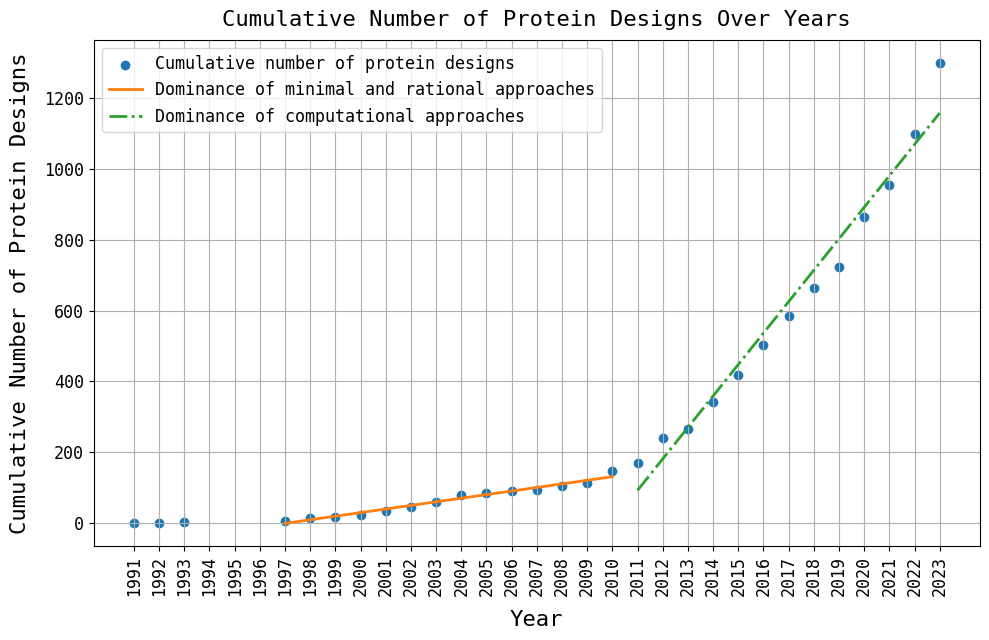

Region 1 fit parameters:
  Slope: 10.131868131868131
  Intercept: -20233.76923076923
  R-squared: 0.9729425100443526
  p-value: 8.956418746890206e-11
  Standard error: 0.48775201149273767
Region 2 fit parameters:
  Slope: 88.74175824175825
  Intercept: -178366.8956043956
  R-squared: 0.9696795574539044
  p-value: 1.0631114981979551e-09
  Standard error: 4.731352815566564


In [40]:

# plt.rcParams["font.family"] = "sans-serif"

region1_mask = (years <= split_year) & (years >= start_year)
region2_mask = (years > split_year)

years_region1 = years[region1_mask]
cumulative_region1 = cumulative[region1_mask]
years_region2 = years[region2_mask]
cumulative_region2 = cumulative[region2_mask]

# Fit linear models to each region
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(years_region1, cumulative_region1)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(years_region2, cumulative_region2)

# Generate predictions for each region
years_fit1 = np.linspace(years_region1.min(), years_region1.max(), 100)
years_fit2 = np.linspace(years_region2.min(), years_region2.max(), 100)
fit_line1 = slope1 * years_fit1 + intercept1
fit_line2 = slope2 * years_fit2 + intercept2

# Plot the original data
plt.rcParams["figure.figsize"] = [10.00, 6.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
ax.scatter(years, cumulative, label="Cumulative number of protein designs", marker="o", color="#1f77b4")

# Plot the fitted lines for each region
ax.plot(years_fit1, fit_line1, label='Dominance of minimal and rational approaches', color="#ff7f0e", linestyle="-", linewidth=2)
ax.plot(years_fit2, fit_line2, label='Dominance of computational approaches', color="#2ca02c", linestyle="-.", linewidth=2)

# Manually set x-axis ticks for every year
plt.xticks(np.arange(years.min(), years.max() + 1, 1), rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Labels and legend
plt.xlabel('Year', fontsize = 16, labelpad=10)
plt.ylabel('Cumulative Number of Protein Designs', fontsize = 16, labelpad=10)
plt.title('Cumulative Number of Protein Designs Over Years', fontsize = 16, pad = 10)
plt.legend( fontsize=12)
plt.grid(True)

### plt.rcParams["font.family"] = "sans-serif"
plt.savefig("20240830_cumulative_growth_fitted_monospace.svg")

plt.show()

# Print parameters and statistics
print("Region 1 fit parameters:")
print("  Slope:", slope1)
print("  Intercept:", intercept1)
print("  R-squared:", r_value1**2)
print("  p-value:", p_value1)
print("  Standard error:", std_err1)

print("Region 2 fit parameters:")
print("  Slope:", slope2)
print("  Intercept:", intercept2)
print("  R-squared:", r_value2**2)
print("  p-value:", p_value2)
print("  Standard error:", std_err2)

plt.savefig("./similarity/figures/240902_growth_curve.svg")

In [29]:
split_years = [2000, 2010]
years = np.array(fixed["year"])
years = years.astype("int64")
cumulative = np.array(fixed["cumulative"])
cumulative = cumulative.astype("int64")